C:\Users\richard\AppData\Local\Temp\ipykernel_18652\2601739669.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a color map


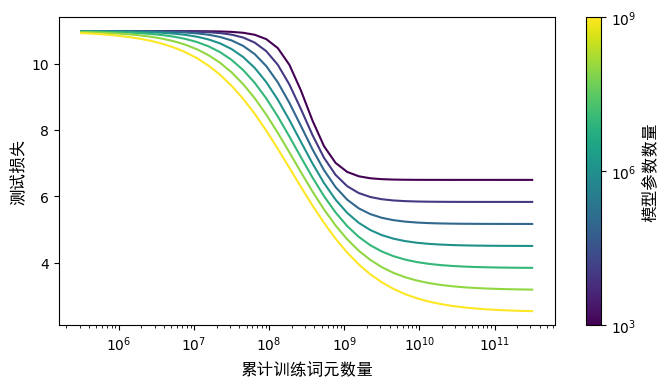

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker 

# Example data
num_models = list(range(3, 10, 1))  # Number of different models
tokens_processed = np.logspace(5.5, 11.5, 40)  # Tokens processed from 10^7 to 10^11

# Initialize plot
fig = plt.figure(figsize=(8, 4))
cmap = plt.cm.get_cmap('viridis')  # Choose a color map


def loss_func(x, i):
    a = 1/(2.5+i*4/6)
    b = 11 - 1/a
    mx = 8.6 - i / 30
    k = 16 / i
    c = np.log(a) - k * mx
    return b + 1 / (a + np.exp(np.log10(x)*k+c))

# Generate plots for models with different parameters
for i in num_models:
    # Generate test loss values
    test_loss = loss_func(tokens_processed, i)
    
    # Plot
    plt.plot(tokens_processed, test_loss, color=cmap((i-3)/6))

# Set color map ticks
def format_func(value, tick_number):  
    v = int(value * 6 + 3)
    return '$10^{' + str(v) + '}$'

# Axes and title
plt.xlabel('累计训练词元数量', fontname='SimHei', fontsize=12)
plt.ylabel('测试损失', fontname='SimHei', fontsize=12)
plt.xscale('log')  # Set x-axis to log scale
# plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca(), label='Number of Models')
# Draw a colorbar with cmap colors and ticks range from 3 to 9
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=plt.gca(), ticks=[0,0.5,1], format=ticker.FuncFormatter(format_func))
cbar.set_label('模型参数数量', fontname='SimHei', fontsize=12)

# Show the plot
#plt.show()
plt.savefig('sample_efficiency.png', dpi=600, bbox_inches='tight')
